<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A12/A12-A/A12-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon May 25 22:27:19 2020


In [2]:
from src.imports import *
from src.dataset.monocularhelper import MonocularHelper
%load_ext tensorboard

In [3]:
print(torch.cuda.is_available())

saved_data1, epoch1, model_state_dict1, optimizer_state_dict1, train_losses1, train_acc1, test_losses1, test_acc1\
            , test_losses1, lr_data1, class_correct, class_total\
= utils.Utils.loadmodel(path=r"savedmodels/DepthMasks/64-4epochs/finalmodelwithdata-64k.pt") 
    

saved_data2, epoch2, model_state_dict2, optimizer_state_dict2, train_losses2, train_acc2, test_losses2, test_acc2\
            , test_losses2, lr_data2, class_correct, class_total\
= utils.Utils.loadmodel(path=r"savedmodels/DepthMasks/128-6epochs/finalmodelwithdata-128k.pt") 

saved_data3, epoch3, model_state_dict3, optimizer_state_dict3, train_losses3, train_acc3, test_losses3, test_acc3\
            , test_losses3, lr_data3, class_correct, class_total\
= utils.Utils.loadmodel(path=r"savedmodels/DepthMasks/224-2epochs/finalmodelwithdata-224k.pt") 

True


In [4]:
train_losses_dm = train_losses1 + train_losses2 + train_losses3
train_acc_dm = train_acc1 + train_acc2 + train_acc3
test_losses_dm = test_losses1 + test_losses2 + test_losses3
test_acc_dm = test_acc1 + test_acc2 + test_acc3
lr_data_dm = lr_data1 + lr_data2 + lr_data3
epoch_dm = epoch1 + epoch2 + epoch3
train_acc_dm = [i * 16 for i in train_acc_dm]
test_acc_dm = [i * 16 for i in test_acc_dm]

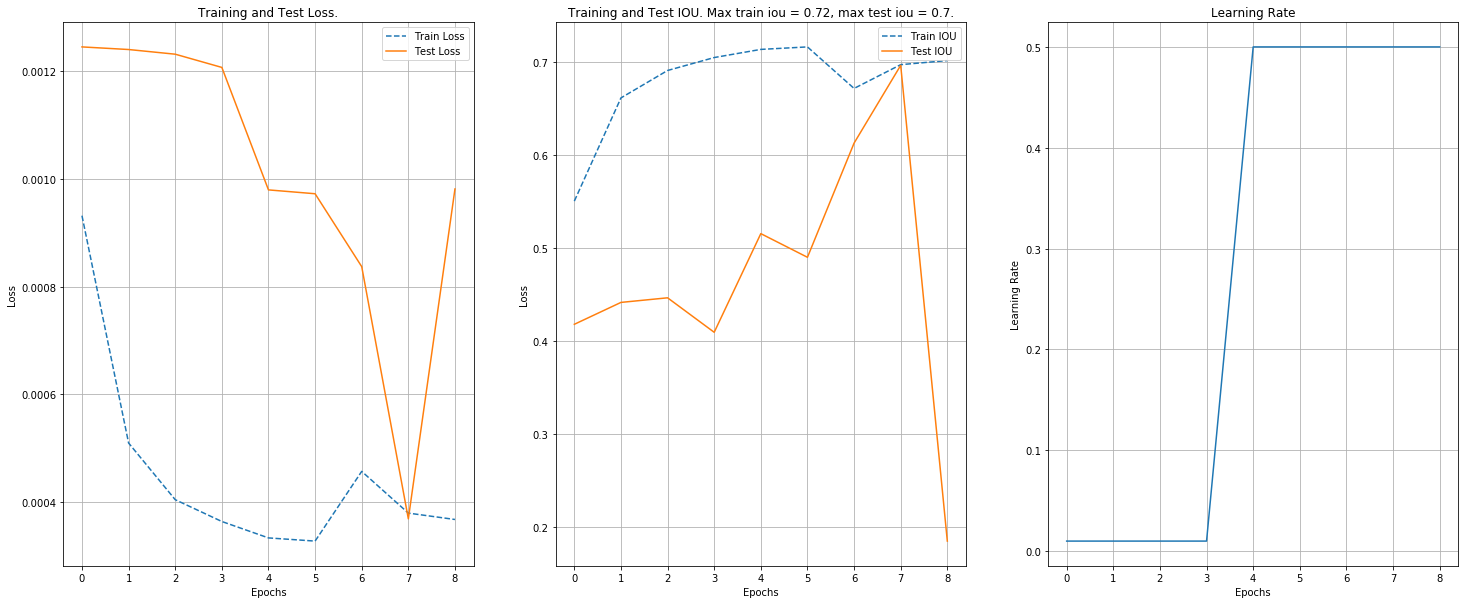

In [5]:
plotdata.PlotData.plottesttraingraph_monocular(train_losses=train_losses_dm,train_acc=train_acc_dm,test_losses=test_losses_dm,
                                     test_acc=test_acc_dm,lr_data=lr_data_dm, plotonsamegraph=True,epochs=epoch_dm,doProcessArray=False)

In [6]:
print(torch.cuda.is_available())

saved_data1, epoch1, model_state_dict1, optimizer_state_dict1, train_losses1, train_acc1, test_losses1, test_acc1\
            , test_losses1, lr_data1, class_correct, class_total\
= utils.Utils.loadmodel(path=r"savedmodels/Masks/64-4epochs/finalmodelwithdata-Mask-64K.pt") 
    

saved_data2, epoch2, model_state_dict2, optimizer_state_dict2, train_losses2, train_acc2, test_losses2, test_acc2\
            , test_losses2, lr_data2, class_correct, class_total\
= utils.Utils.loadmodel(path=r"savedmodels/Masks/128-3epochs/finalmodelwithdata-Mask-128K.pt") 


True


In [7]:
train_losses_m = train_losses1 + train_losses2
train_acc_m = train_acc1 + train_acc2 
test_losses_m = test_losses1 + test_losses2
test_acc_m = test_acc1 + test_acc2
lr_data_m = lr_data1 + lr_data2
epoch_m = epoch1 + epoch2
train_acc_m = [i * 16 for i in train_acc_m]
test_acc_m = [i * 16 for i in test_acc_m]

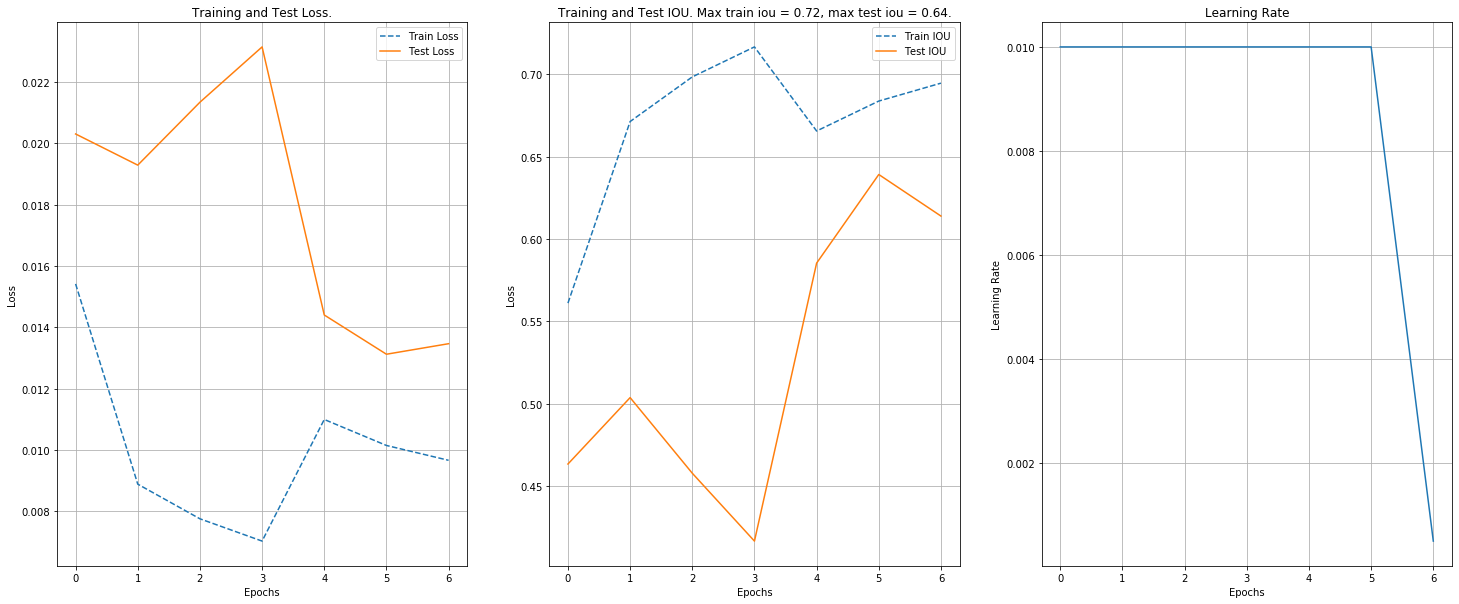

In [8]:
plotdata.PlotData.plottesttraingraph_monocular(train_losses=train_losses_m,train_acc=train_acc_m,test_losses=test_losses_m,
                                     test_acc=test_acc_m,lr_data=lr_data_m, plotonsamegraph=True,epochs=epoch_m,doProcessArray=False)

In [9]:
torch.backends.cudnn.benchmark = True

In [10]:
dm_modelpath='savedmodels/DepthMasks/224-2epochs/checkpoint-2-224.pt'
mask_modelpath='savedmodels/Masks/128-3epochs/checkpoint-3.pt'

saved_data1, epoch1, model_state_dict1, optimizer_state_dict1, train_losses1, train_acc1, test_losses1, test_acc1\
            , test_losses1, lr_data1, class_correct, class_total\
= utils.Utils.loadmodel(path=dm_modelpath) 
    

saved_data2, epoch2, model_state_dict2, optimizer_state_dict2, train_losses2, train_acc2, test_losses2, test_acc2\
            , test_losses2, lr_data2, class_correct, class_total\
= utils.Utils.loadmodel(path=mask_modelpath) 

cnn_model_dm, device = utils.Utils.createDepthModel(model_state_dict1)
cnn_model_m, device = utils.Utils.createMonocularModel(model_state_dict2)

cuda
cuda


In [11]:
helper = MonocularHelper()
# final_output = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedImages'
# final_output_mask = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedMask'
# final_output_dm = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedDepthMasks'
# bg_path = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/Background'
# torch.backends.cudnn.benchmark = True
torch.backends.cudnn.benchmark = True
final_output = r'C:\MonocularDS\OverLayedImages'
final_output_mask = r'C:\MonocularDS\OverLayedMask'
final_output_dm = r'C:\MonocularDS\OverLayedDepthMasks'
bg_path = r'C:\MonocularDS\Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

print(len(train_label))
print(len(test_label))

batch_size = 4
image_size = 224

# mean = [0.4222796, 0.44544333, 0.44153902]
# std = [0.28497052, 0.24810323, 0.2657039]

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
ds = dst.Dataset()

train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                               train_transforms=train_transforms)

test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                             test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  6.99it/s]

280000
120000
4


In [12]:
# sample = next(iter(test_loader))

2
4


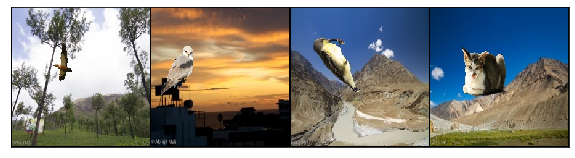

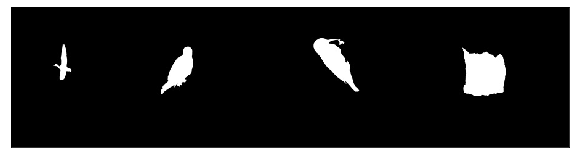

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


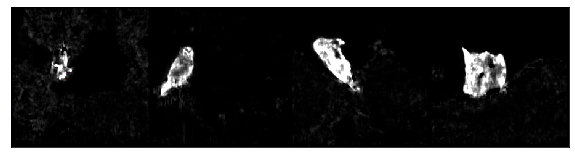

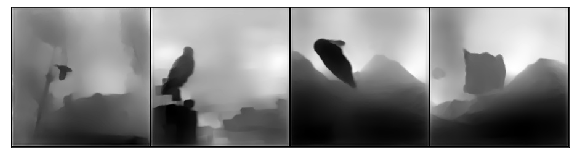

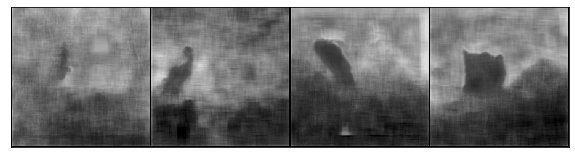

In [13]:
sample = next(iter(test_loader))
print(len(sample))
print(len(sample[1]))
imgs = sample[0]

imgs[0] = imgs[0].to(device)
imgs[1] = imgs[1].to(device)
imgs[2] = imgs[2].to(device)
imgs[3] = imgs[3].to(device)


grid_1 = torchvision.utils.make_grid(imgs[0])
utils.Utils.show(grid_1, nrow=4)

# imgs = sample[0][2]
grid_2 = torchvision.utils.make_grid(imgs[2])
utils.Utils.show(grid_2, nrow=4)

cnn_model_m.eval()
output_m = cnn_model_m(imgs)
utils.Utils.show(output_m.detach().cpu(), nrow=4)

# imgs = sample[0][3]
grid_3 = torchvision.utils.make_grid(imgs[3])
utils.Utils.show(grid_3, nrow=4)


cnn_model_dm.eval()
output_dm = cnn_model_dm(imgs)
utils.Utils.show(output_dm.detach().cpu(), nrow=8)

torch.cuda.empty_cache()

In [26]:
writer = SummaryWriter("monocular_depth_estimation")
writer.add_image('fg_bg', grid_1, 0)
writer.add_image('mask_truth', grid_2, 1)
# writer.add_image('mask_pred', output_m, 2)
writer.add_image('depthmask_truth', grid_3, 1)
# writer.add_image('depthmask_pred', output_dm, 4)
# writer.add_graph(cnn_model_dm,sample[0][0])
# writer.add_graph(cnn_model_m,sample[0][0])

In [30]:

print(epoch_dm)
for epoch in range(0, len(train_losses_dm)):
    writer.add_scalars('DM Loss', {'Train': train_losses_dm[epoch],'Test': test_losses_dm[epoch],}, epoch+1)
    writer.add_scalars('DM Accuracy', {'Train': train_acc_dm[epoch],'Test': test_acc_dm[epoch],}, epoch+1)
    writer.add_scalar('DM LR', lr_data_dm[epoch], epoch+1)
    writer.add_histogram('DM Test Accuracy distribution', test_acc_dm[epoch], epoch+1)
    writer.add_histogram('DM Test Loss distribution', test_losses_dm[epoch], epoch+1)
    writer.add_histogram('DM Train Accuracy distribution', train_acc_dm[epoch], epoch+1)
    writer.add_histogram('TDM rain Loss distribution', train_losses_dm[epoch], epoch+1)
    
writer.close()

17


In [43]:
!python -m tensorboard.main --logdir=monocular_depth_estimation

^C


In [ ]:
print(epoch_m) 
for epoch in range(0, len(train_losses_m)): 
    writer.add_scalars('Mask Loss', {'Train': train_losses_m[epoch],'Test': test_losses_m[epoch],}, epoch+1) 
    writer.add_scalars('Mask Accuracy', {'Train': train_acc_m[epoch],'Test': test_acc_m[epoch],}, epoch+1) 
    writer.add_scalar('Mask LR', lr_data_m[epoch], epoch+1) 
    writer.add_histogram('Mask Test Accuracy distribution', test_acc_m[epoch], epoch+1) 
    writer.add_histogram('Mask Test Loss distribution', test_losses_m[epoch], epoch+1) 
    writer.add_histogram('Mask Train Accuracy distribution', train_acc_m[epoch], epoch+1) 
    writer.add_histogram('Mask rain Loss distribution', train_losses_m[epoch], epoch+1)

writer.close()

In [64]:
def tensor2img(tensor, ax=plt):
    tensor = tensor.squeeze()
#     if len(tensor.shape) > 2: tensor = tensor.permute(1, 2, 0)
    img = tensor.detach().cpu().numpy()

    return img

In [ ]:
# writer.add_image('mask_pred', (output_m).detach().cpu().numpy(), 2)
# writer.add_image('depthmask_pred', output_dm, 4)
# writer.add_graph(cnn_model_dm,sample[0][0])
# writer.add_graph(cnn_model_m,sample[0][0])

In [ ]:
torch.cuda.empty_cache()